In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math # to compute Benford's law
import matplotlib.ticker as mtick # to format axis with percentage
import matplotlib.pyplot as plt # to plot stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-of-atm-transaction-of-xyz-bank/AggregatedData.csv


**Define helper functions**

In [2]:
def benfords_law(x):
    return 100 * math.log10(1+(1/x))

def leading_digit(x):
    while (x >= 10):
        x = x // 10
    return x

def compute_density(x):
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i]
        
    for i in range(len(x)):
        x[i] = 100 * x[i] / sum  
    
    return x

def compute_transactions_density(samples):
    count = [0] * 9
    for i in samples:
        digit = leading_digit(i)
        count[digit-1] = count[digit-1] + 1
    
    return compute_density(count);

def generate_digits_density(samples):
    count = [0] * 9
    for i in range(1, samples+1):
        digit = leading_digit(i)
        count[digit-1] = count[digit-1] + 1
    
    return compute_density(count)

def generate_fibonacci_density(samples):
    count = [0] * 9
    first = 0
    second = 1
    count[0] = 1
    
    for i in range(1, samples+1):
        fibonacci = first + second
        digit = leading_digit(fibonacci)
        count[digit-1] = count[digit-1] + 1
        
        first = second
        second = fibonacci

    return compute_density(count)

def print_data(actual, datalabel):
    x = np.arange(1, 10)
    x_benfords_law = np.array(list(map(benfords_law, x)))

    fig = plt.figure()
    a1 = fig.add_axes([0,0,1,1])
    a1.set_ylabel('Density')
    a1.set_xlabel('Leading digit')

    a1.plot(x, x_benfords_law, '-ob', linewidth=3)
    a1.yaxis.set_major_formatter(mtick.PercentFormatter())
    a1.set_ylim([0, 35])
    
    a2 = a1.twinx()
    a2.plot(x, actual,'-oy', linewidth=3)
    a2.yaxis.set_major_formatter(mtick.PercentFormatter())
    a2.set_ylim([0, 35])

    fig.legend(labels = ('Benford\'s Law', datalabel), bbox_to_anchor=(1.2, 1.0), loc='upper left')
    plt.show()

**Load the bank statements data into a pandas data frame**

In [3]:
data = pd.read_csv('../input/data-of-atm-transaction-of-xyz-bank/AggregatedData.csv')
data.describe()

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
count,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,1.158900e+04
mean,123.341099,67.567694,55.773406,5.223059e+05,3.345604e+05,1.877455e+05
std,67.315288,47.849517,38.506475,3.248167e+05,2.470771e+05,1.502351e+05
min,1.000000,0.000000,0.000000,1.000000e+02,0.000000e+00,0.000000e+00
25%,79.000000,34.000000,25.000000,3.057000e+05,1.560000e+05,7.910000e+04
50%,115.000000,57.000000,50.000000,4.700000e+05,2.816000e+05,1.586000e+05
75%,158.000000,87.000000,78.000000,6.716000e+05,4.485000e+05,2.560000e+05
max,491.000000,345.000000,310.000000,2.549800e+06,1.907800e+06,1.472600e+06


**Compute distribution from the first 2,000 positive integers**

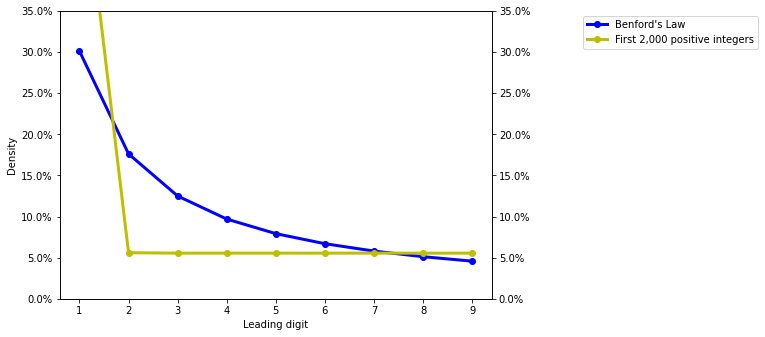

In [4]:
actual = generate_digits_density(2000)
datalabel = 'First 2,000 positive integers'
print_data(actual, datalabel)

**Compute distribution from the first 2,000 Fibonacci numbers**

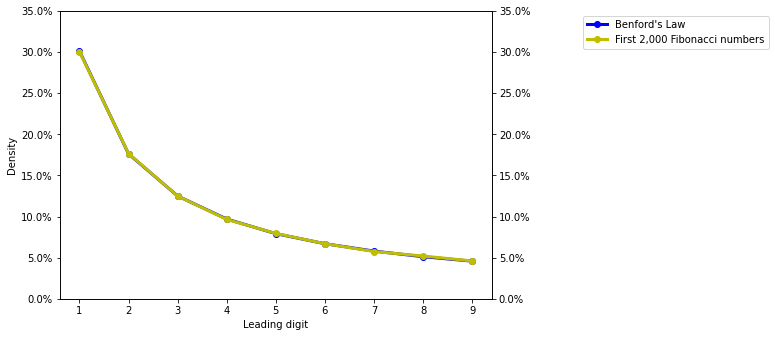

In [5]:
actual = generate_fibonacci_density(2000)
datalabel = 'First 2,000 Fibonacci numbers'
print_data(actual, datalabel)

**Compute ditribution from the ATM transactions**

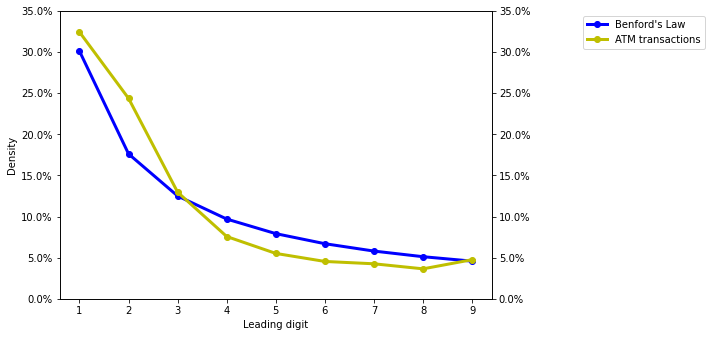

In [6]:
actual = compute_transactions_density(data['Amount withdrawn Other Card'].values)
datalabel = 'ATM transactions'
print_data(actual, datalabel)